In [85]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os import mkdir, path, getcwd
from osgeo import ogr

In [2]:
world_population = pd.read_csv(r"world_pop_data/API_SP.POP.TOTL_DS2_en_csv_v2_4662410.csv")
countries_geometries = gpd.read_file(r"wb_countries_admin0_10m/WB_countries_Admin0_10m.shp")

In [4]:
world_pop_set = set(world_population['Country Code'])
countries_geom_set = set(countries_geometries['ISO_A3'])

countries_intersection = countries_geom_set.intersection(world_pop_set)

In [5]:
world_population_filtered = world_population.loc[world_population['Country Code'].isin(countries_intersection)]
countries_geom_filtered = countries_geometries.loc[countries_geometries['ISO_A3'].isin(countries_intersection)].drop_duplicates(subset=["ISO_A3"])

In [11]:
countries = countries_geom_filtered[['ISO_A3', 'FORMAL_EN', 'NAME_EN', 'geometry']]

In [29]:
countries_pop = pd.merge(countries, world_population_filtered, how='inner',
                        left_on="ISO_A3", right_on="Country Code")

In [31]:
countries_pop.fillna(0, inplace=True)

In [36]:
#Exportar a shape
user_input = str(input("Deseas exportar el archivo?: y/n "))
if user_input == 'y':
    directory = str(input("Introduce el nombre de la carpeta en la que estará el archivo: "))
    filename = str(input("Nombre del archivo con su extensión: "))
    path_file = path.join(getcwd(), directory)
    mkdir(path_file)
    countries_pop.to_file(path_file + "\\" + filename)
elif user_input == 'n':
    print('adiós')
else:
    print('no es una opción válida')

Deseas exportar el archivo?: y/n  y
Introduce el nombre de la carpeta en la que estará el archivo:  test2
Nombre del archivo con su extensión:  prueba3.shp


C:\Users\Vivaldo\AppData\Local\Temp\ipykernel_1424\750505104.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  countries_pop.to_file(path_file + "\\" + filename)


## parte 2

In [37]:
ds = gpd.read_file(r"test2/prueba3.shp")

In [56]:
ds.shape

(213, 70)

In [45]:
years_data = ds.iloc[:,7:69]

In [46]:
years = np.array(years_data.columns)

In [48]:
column_names_variation = []
series_variation = []

i = 0
for year in years:
    start = years[i]
    i += 1
    end = years[i]
    value = ((years_data[end] / years_data[start])-1) * 100
    series_variation.append(value)
    column_names_variation.append("{}-{}".format(start, end))
    #print(start, end, value)
    if i == 61:
        break
    
variation_per_year = dict(zip(column_names_variation, series_variation))

In [50]:
variation_per_year_df = pd.DataFrame(variation_per_year)

In [51]:
variation_per_year_df

,1960-1961,1961-1962,1962-1963,1963-1964,1964-1965,1965-1966,1966-1967,1967-1968,1968-1969,1969-1970,...,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021
0,2.674987,2.685927,2.698839,2.716860,2.736098,2.751006,2.756750,2.752878,2.738226,2.715329,...,1.360877,1.349800,1.319576,1.275901,1.228071,1.183142,1.140967,1.103976,1.070872,1.037631
1,3.205837,3.261129,3.237955,3.120599,2.947224,2.766214,2.617322,2.505017,2.441371,2.414698,...,1.456241,1.378600,1.349500,1.353883,1.366613,1.368772,1.361140,1.337717,1.302697,1.267370
2,2.100286,2.084478,2.046681,1.982165,1.901550,1.815886,1.739819,1.683403,1.652291,1.639740,...,0.967733,0.983612,1.066829,1.184680,1.334027,1.435345,1.400785,1.189957,0.866261,0.502992
3,1.968656,1.985597,2.003552,2.025371,2.049291,2.071176,2.090131,2.110850,2.134393,2.158821,...,1.612913,1.587041,1.556974,1.524445,1.491205,1.459695,1.432048,1.408967,1.389087,1.369884
4,2.871558,2.898976,2.910210,2.902372,2.881732,2.855175,2.831572,2.814456,2.805977,2.802622,...,0.828572,0.905541,1.062626,1.264082,1.494211,1.675815,1.733115,1.629287,1.419186,1.175457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2.635271,1.903739,1.465798,1.784534,2.254174,2.884877,3.368310,3.514459,3.642357,3.363282,...,0.542462,0.883880,0.940021,0.864360,0.731458,0.651396,0.594133,0.569530,0.601262,0.613305
209,3.367625,3.121519,2.888992,2.664167,2.484581,2.322442,2.229059,2.342140,2.683751,3.188748,...,1.704725,1.160590,1.600269,2.677997,3.931908,4.789195,5.044118,4.570038,3.681472,2.745208
210,1.591823,3.356681,4.572956,5.053597,4.994937,4.903456,4.797152,4.290651,3.362632,2.223911,...,2.397097,2.363497,2.224231,2.013351,1.782283,1.591648,1.454436,1.395272,1.389032,1.393565
211,1.323983,1.434669,1.357625,1.346770,1.382125,1.313725,1.139588,1.043959,1.164700,1.246639,...,0.370741,0.295256,0.360476,0.444204,0.533597,0.592954,0.585642,0.657222,0.557087,0.526933


In [52]:
final_df = pd.concat([ds, variation_per_year_df], axis=1, join='inner')

In [57]:
final_df.to_file("test2/final.shp")

## Plot by variation

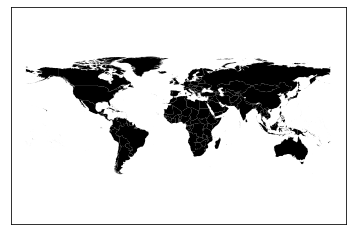

In [90]:
def plot_polygon(poly, symbol = 'k-', **kwargs):
    for i in range(poly.GetGeometryCount()):
        subgeom = poly.GetGeometryRef(i)
        x, y = zip(*subgeom.GetPoints())
        plt.fill(x, y, symbol, **kwargs)

def plot_layer(filename, symbol, layer_index = 0, **kwargs):
    ds = ogr.Open(filename)
    for row in ds.GetLayer(layer_index):
        geom = row.geometry()
        geom_type = geom.GetGeometryType()
        if geom_type == ogr.wkbPolygon:
            plot_polygon(geom, symbol, **kwargs)
        elif geom_type == ogr.wkbMultiPolygon:
            for i in range(geom.GetGeometryCount()):
                subgeom = geom.GetGeometryRef(i)
                plot_polygon(subgeom, symbol, **kwargs)
                
plot_layer(r'test2/final.shp', 'k-')
plt.axis('equal')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.show()

In [65]:
map_years = final_df.iloc[:, 70:131]

In [66]:
years_to_iter = np.array(map_years.columns)

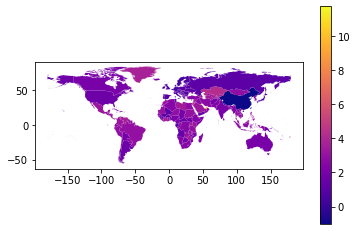

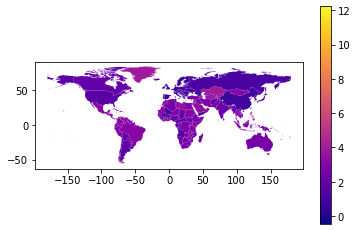

In [83]:
i = 0
for period in years_to_iter:
    i+=1
    
    final_df[["geometry",period]].plot(period, cmap="plasma", legend=True)
    if i == 2:
        break